
**Import Pachages**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
%matplotlib inline
from datetime import datetime
from pandas import Series
import seaborn as sns


#**Reading and Understanding the Data**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving GMV par TheDate (2).xlsx to GMV par TheDate (2).xlsx


In [ ]:
df = pd.DataFrame(pd.read_excel("GMV par TheDate (2).xlsx",skiprows=2))
df.head()

,TheDate,GMV
0,2021-02-14,22050.0
1,2021-02-15,12715.0
2,2021-02-16,3325.0
3,2021-02-17,4810.0
4,2021-02-18,2990.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 415 entries, 0 to 414
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   TheDate  415 non-null    datetime64[ns]
 1   GMV      415 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.6 KB


In [ ]:
df.describe()

,GMV
count,415.000000
mean,14889.236024
std,15209.513236
min,280.000000
25%,7567.500000
50%,12035.000000
75%,16755.000000
max,153885.000000


**Data Cleaning**

In [ ]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TheDate    0.0
GMV        0.0
dtype: float64

**Exploraty Data Analysis (EDA)**

In [ ]:
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

In [ ]:
#df.plot()

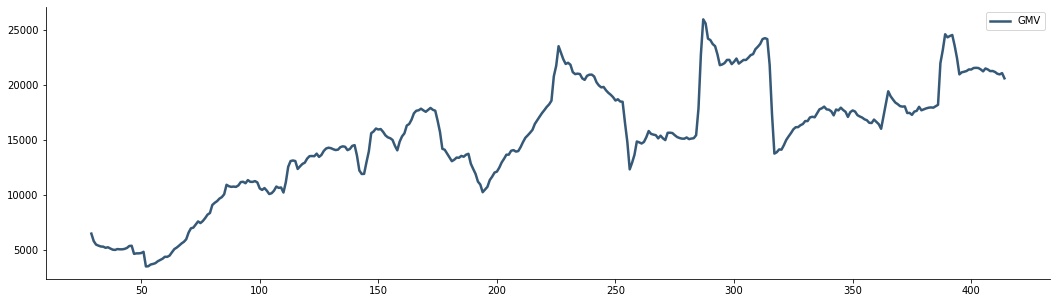

In [ ]:
df.rolling(30).mean().plot()

#***SINGLE SERIES***


---The objective requires us to predict GMV for the next month .

 first let's understand how to forecast for a single series.

I've chosen to predict for the GMV per month for the entire company.

First let's compute the GMV per month and plot that data.

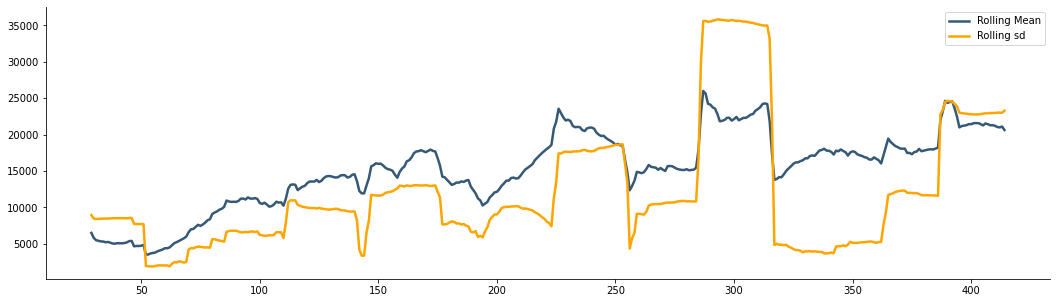

In [ ]:
plt.figure()
plt.plot(df.rolling(window=30,center=False).mean(),label='Rolling Mean');
plt.plot(df.rolling(window=30,center=False).std(),label='Rolling sd',color='orange');
plt.legend();

###**Train-Test Split**
---Split our variable into training and testing sets. It is usually a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [ ]:
test_size = 100
train = df[:-test_size]
test = df[-test_size:]


***Make copy of Original***

In [ ]:
train_original = train.copy()
test_original = test.copy()

In [ ]:
train.columns,test.columns

(Index(['GMV'], dtype='object'), Index(['GMV'], dtype='object'))

In [ ]:
train.dtypes,test.dtypes

(GMV    float64
 dtype: object, GMV    float64
 dtype: object)

In [ ]:
train.shape, test.shape

((315, 1), (100, 1))

***Extract Features from Time***

In [ ]:
train['TheDate'] = pd.to_datetime(train.TheDate, format = '%d-%m-%Y %H:%M')
test['TheDate'] = pd.to_datetime(test.TheDate, format = '%d-%m-%Y %H:%M')
train_original['TheDate'] = pd.to_datetime(train_original.TheDate, format = '%d-%m-%Y %H:%M')
test_original['TheDate'] = pd.to_datetime(test_original.TheDate, format = '%d-%m-%Y %H:%M')

In [ ]:
for i in (train, test, train_original, test_original):
    i['year'] = i.TheDate.dt.year
    i['month'] = i.TheDate.dt.month
    i['day']= i.TheDate.dt.day


**Exploratory Analysis**

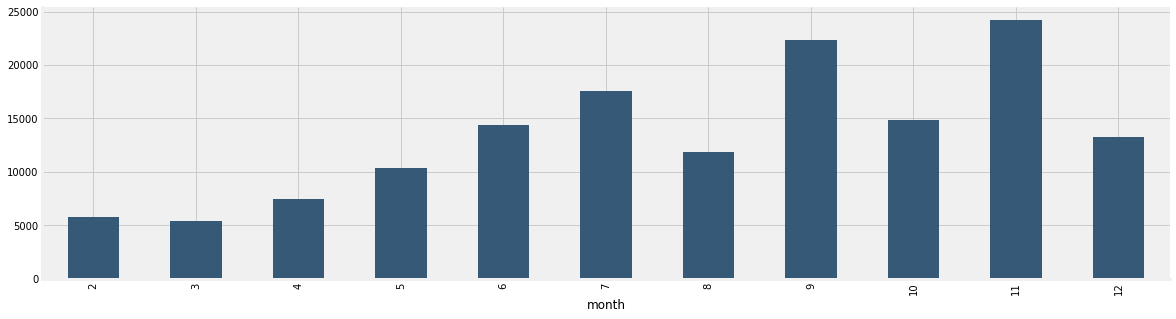

In [ ]:
train.groupby('month')['GMV'].mean().plot.bar()

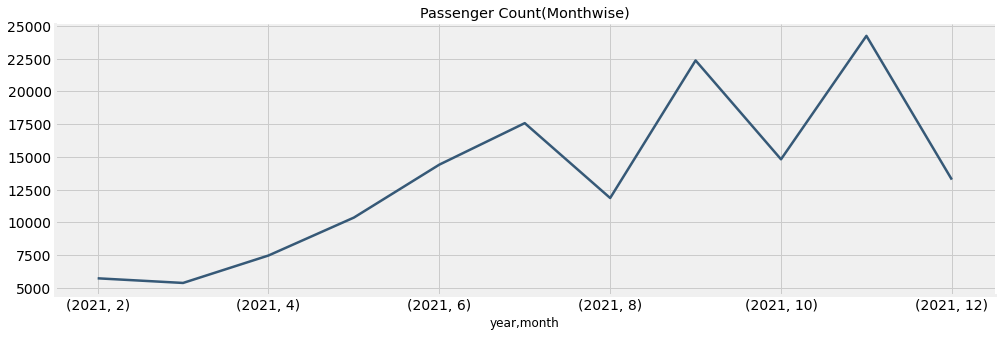

In [ ]:
temp = train.groupby(['year', 'month'])['GMV'].mean()
temp.plot(figsize =(15,5), title = "Passenger Count(Monthwise)", fontsize = 14)

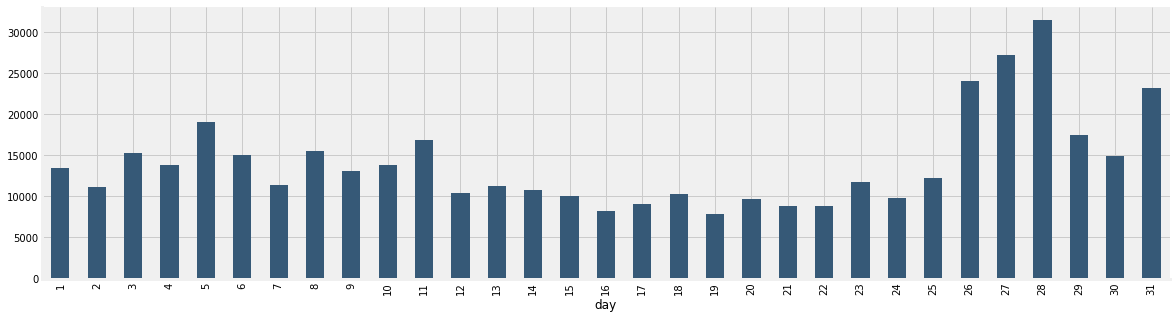

In [ ]:
train.groupby('day') ['GMV'].mean().plot.bar()

In [ ]:
train.Timestamp = pd.to_datetime(train.TheDate, format = '%d-%m-%y %H:%M')
train.index = train.Timestamp

#Daily
daily = train.resample('D').mean()

#Weekly
weekly = train.resample('W').mean()

#Monthly
monthly = train.resample('M').mean()

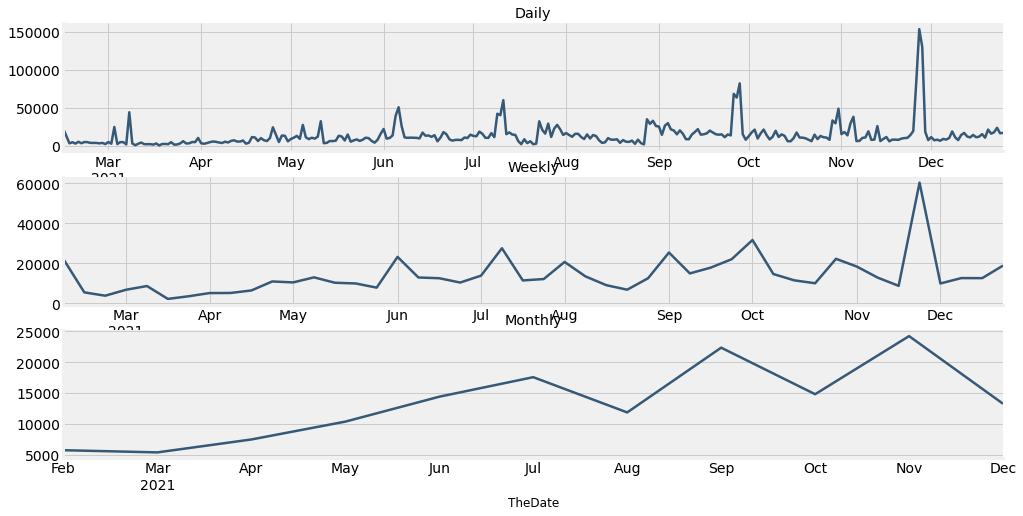

In [ ]:
fig,axs = plt.subplots(3,1)

daily.GMV.plot(figsize = (15,8), title = "Daily", fontsize = 14, ax = axs[0])
weekly.GMV.plot(figsize = (15,8), title = "Weekly", fontsize = 14, ax = axs[1])
monthly.GMV.plot(figsize = (15,8), title = "Monthly", fontsize = 14, ax = axs[2])

In [ ]:
test.Timestamp = pd.to_datetime(test.TheDate, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

#Converting to Daily mean
test = test.resample('W').mean()

train.Timestamp = pd.to_datetime(train.TheDate, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

#Converting to Daily mean
train = train.resample('W').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


In [ ]:
test.Timestamp = pd.to_datetime(test.TheDate, format='%d-%m-%Y %H:%M')
test.index = test.Timestamp

#Converting to Daily mean
test = test.resample('W').mean()

train.Timestamp = pd.to_datetime(train.TheDate, format='%d-%m-%Y %H:%M')
train.index = train.Timestamp

#Converting to Daily mean
train = train.resample('W').mean()

***Divide data into training and validation***

In [ ]:
valid_size = 70
Train = df[:-valid_size]
valid = df[-valid_size:]


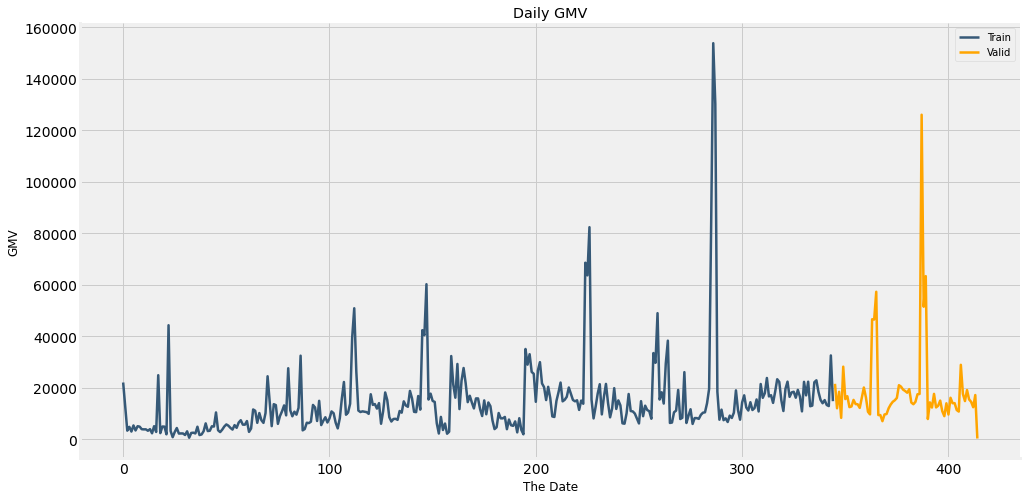

In [ ]:
Train.GMV.plot(figsize = (15,8), title = 'Daily GMV', fontsize = 14, label = 'Train')
valid.GMV.plot(figsize = (15,8), title = 'Daily GMV', fontsize =14, label = 'Valid',color='orange')
plt.xlabel('The Date')
plt.ylabel('GMV')
plt.legend(loc = 'best')

Text(0.5, 1.0, 'Naive Forecast')

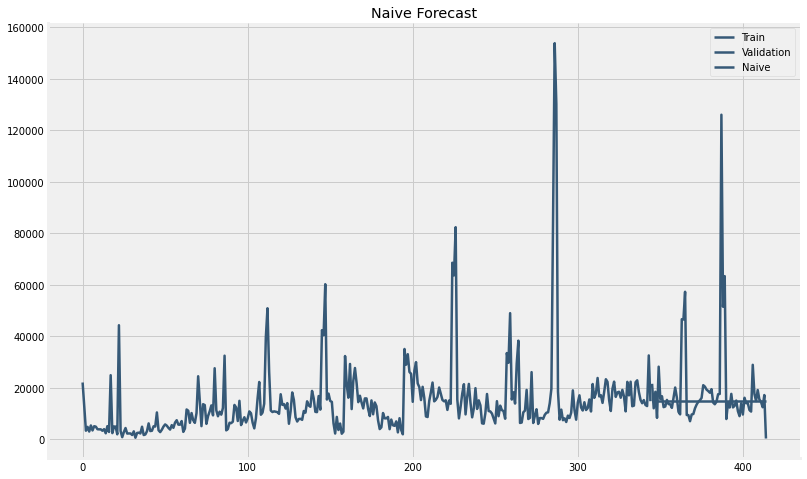

In [ ]:
dd = np.asarray(Train.GMV)
y_hat =valid.copy()
y_hat['naive']= dd[len(dd)- 1]
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['GMV'],label = 'Train')
plt.plot(valid.index, valid['GMV'], label = 'Validation')
plt.plot(y_hat.index, y_hat['naive'],  label = 'Naive')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

#**Moving Average Model**

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

Train_log = np.log(Train['GMV'])
valid_log = np.log(valid['GMV'])
moving_avg = pd.rolling_mean(Train_log,24)
plt.plot(Train_log)
plt.plot(moving_avg, color = 'red')

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize = (15,8))
model = ARIMA(Train_log, order = (0,1,2)) # here the p value is 0 since it is moving average model
results_MA = model.fit(disp = -1)
plt.plot(train_log_diff.dropna(), label = "Original")
plt.plot(results_MA.fittedvalues, color = "red", label = "Prediction")
plt.legend(loc = "best")